These exercises use the tips dataset in Seaborn to explore various visualization techniques. The dataset contains restaurant tip data with columns: `total_bill`, `tip`, `sex`, `smoker`, `day`, `time`, and `size`. For each exercise, load the dataset using `sns.load_dataset('tips')` and create the specified plot. Refer to the Seaborn documentation (https://seaborn.pydata.org/) for details on functions and parameters.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
tips = sns.load_dataset('tips')

In [2]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### **Exercise 1: Bar Plot**

**Task:** Create a bar plot showing the average tip amount for each day of the week. Use different colors for each day and add error bars to show the confidence interval.<br>
**Instructions:** Use `sns.barplot()`. Check the documentation for the `hue` and `ci` parameters to customize colors and error bars. Add a title and label the axes.<br>
**Hint:** Group the data by `day` and compute the mean `tip`.

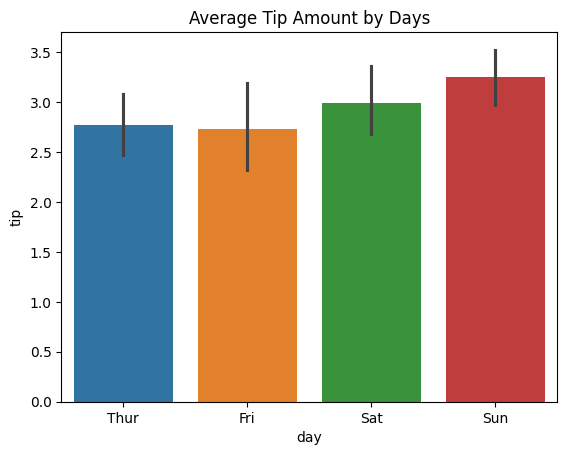

In [3]:
sns.barplot(data=tips, x="day", y="tip", hue="day", errorbar= ('ci', 95))
plt.title("Average Tip Amount by Days")
plt.show()

### **Exercise 2: Histogram**

**Task**: Plot a histogram of the total bill amounts, with separate histograms for male and female customers overlaid on the same plot. Use different colors and transparency for clarity.  
**Instructions**: Use `sns.histplot()`. Explore the `hue` parameter to differentiate by `sex` and set `alpha` for transparency. Read the documentation to adjust the number of bins (`bins`). Set a title and axis labels.  
**Hint**: Use `element='step'` for a cleaner overlay of histograms.

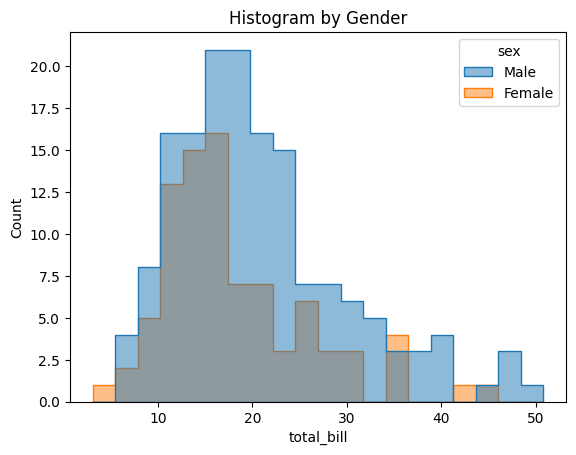

In [4]:
sns.histplot(data=tips, x="total_bill", hue="sex", bins=20, alpha=0.5, element="step")
plt.title("Histogram by Gender")
plt.show()

### **Exercise 3: Pie Chart**

    **Task**: Create a pie chart showing the proportion of customers by party size (`size`). Each slice should represent a unique party size, with percentages displayed.  
    **Instructions**: Seaborn doesn’t have a direct pie chart function, so use `matplotlib.pyplot.pie()` with data aggregated from the tips dataset. Compute the count of each `size` using `value_counts()`. Customize the chart with colors and labels; refer to Matplotlib’s pie chart documentation for `autopct`.  
    **Hint**: Use `tips['size'].value_counts()` to get the data and pass it to `plt.pie()`.

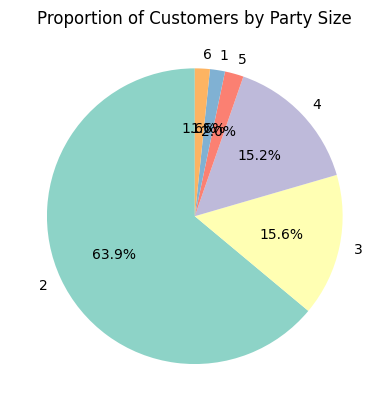

In [5]:
sizes = tips['size'].value_counts()
plt.pie(sizes, labels=sizes.index, autopct='%1.1f%%', startangle=90,  colors=plt.cm.Set3.colors)

plt.title("Proportion of Customers by Party Size")
plt.show()

### **Exercise 4: Scatter Plot**

**Task**: Create a scatter plot of `total_bill` (x-axis) vs. `tip` (y-axis), with points colored by `smoker` status and sized by party `size`.  
**Instructions**: Use `sns.scatterplot()`. Check the documentation for `hue` and `size` parameters to encode additional variables. Add a title, axis labels, and a legend.  
**Hint**: Adjust the `sizes` parameter to control the range of point sizes (e.g., `sizes=(20, 200)`).

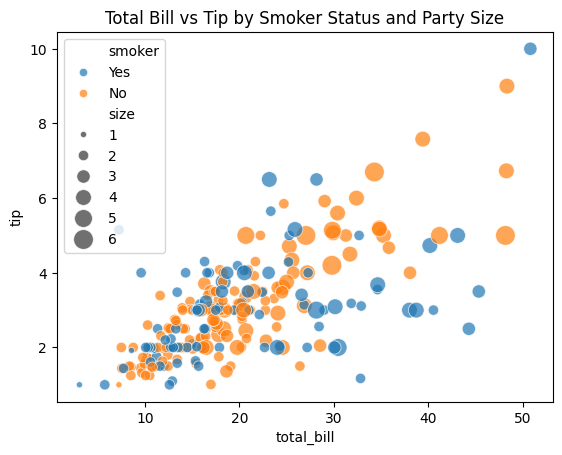

In [6]:
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="smoker", size="size", sizes=(20, 200), alpha=0.7)
plt.title("Total Bill vs Tip by Smoker Status and Party Size")
plt.show()

### **Exercise 5: Line Plot**

**Task**: Plot the average tip amount over different party sizes, with separate lines for lunch and dinner (`time`). Include confidence intervals as shaded areas.  
**Instructions**: Use `sns.lineplot()`. Read the documentation to use `hue` for `time` and enable confidence intervals with `ci='sd'`. Group the data by `size` and `time` to compute mean `tip`. Add a title and labels.  
**Hint**: The x-axis should represent `size` (1 to 6), and the y-axis should show mean `tip`.

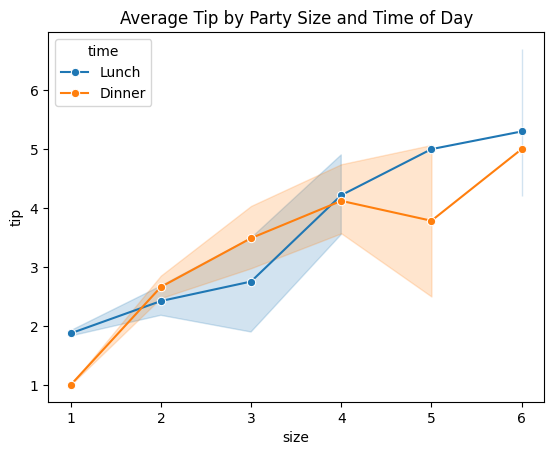

In [7]:
sns.lineplot(data=tips, x="size", y="tip", hue="time", errorbar= ('ci', 95), marker="o")
plt.title("Average Tip by Party Size and Time of Day")
plt.show()

### **Exercise 6: Catplot**

**Task**: Create a categorical plot to compare tip amounts across days, with separate subplots for `smoker` status. Use box plots to show the distribution of tips.  
**Instructions**: Use `sns.catplot()`. Explore the documentation for the `kind` parameter (set `kind='box'`) and `col` to create subplots by `smoker`. Set `x='day'`, `y='tip'`. Add a title to the figure using `fig.suptitle()`.  
**Hint**: Check how to adjust the figure size in `catplot` with `height` and `aspect`.

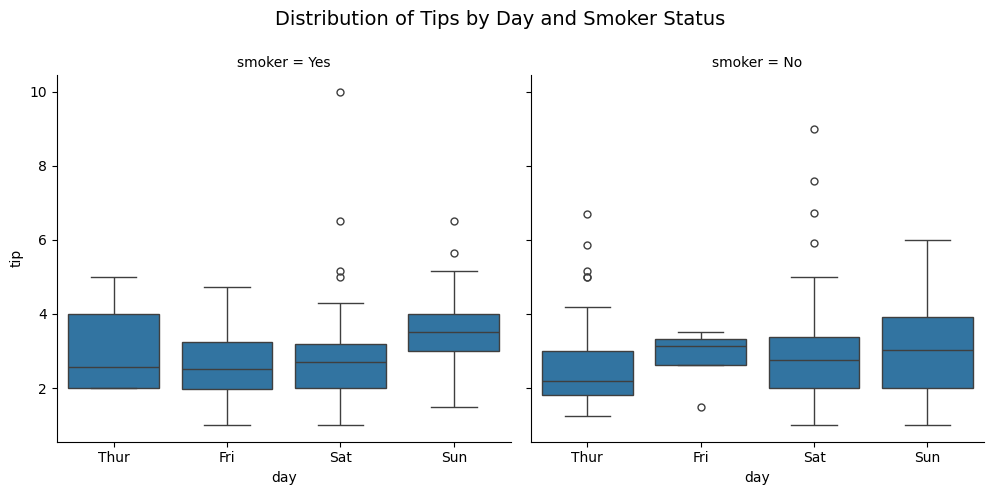

In [8]:
g = sns.catplot(data=tips, x="day", y="tip", kind="box", col="smoker", height=5, aspect=1)

g.fig.suptitle("Distribution of Tips by Day and Smoker Status", fontsize=14)
g.fig.subplots_adjust(top=0.85)
plt.show()

### **Exercise 7: Relplot**

**Task**: Create a relational plot showing `total_bill` vs. `tip`, with subplots for each `day` and points colored by `sex`. Use different markers for male and female customers.  
**Instructions**: Use `sns.relplot()`. Refer to the documentation for `col` to split by `day`, `hue` for `sex`, and `style` for different markers. Add a title and ensure the legend is clear.  
**Hint**: Use `col_wrap=2` to arrange subplots in a 2-column grid.

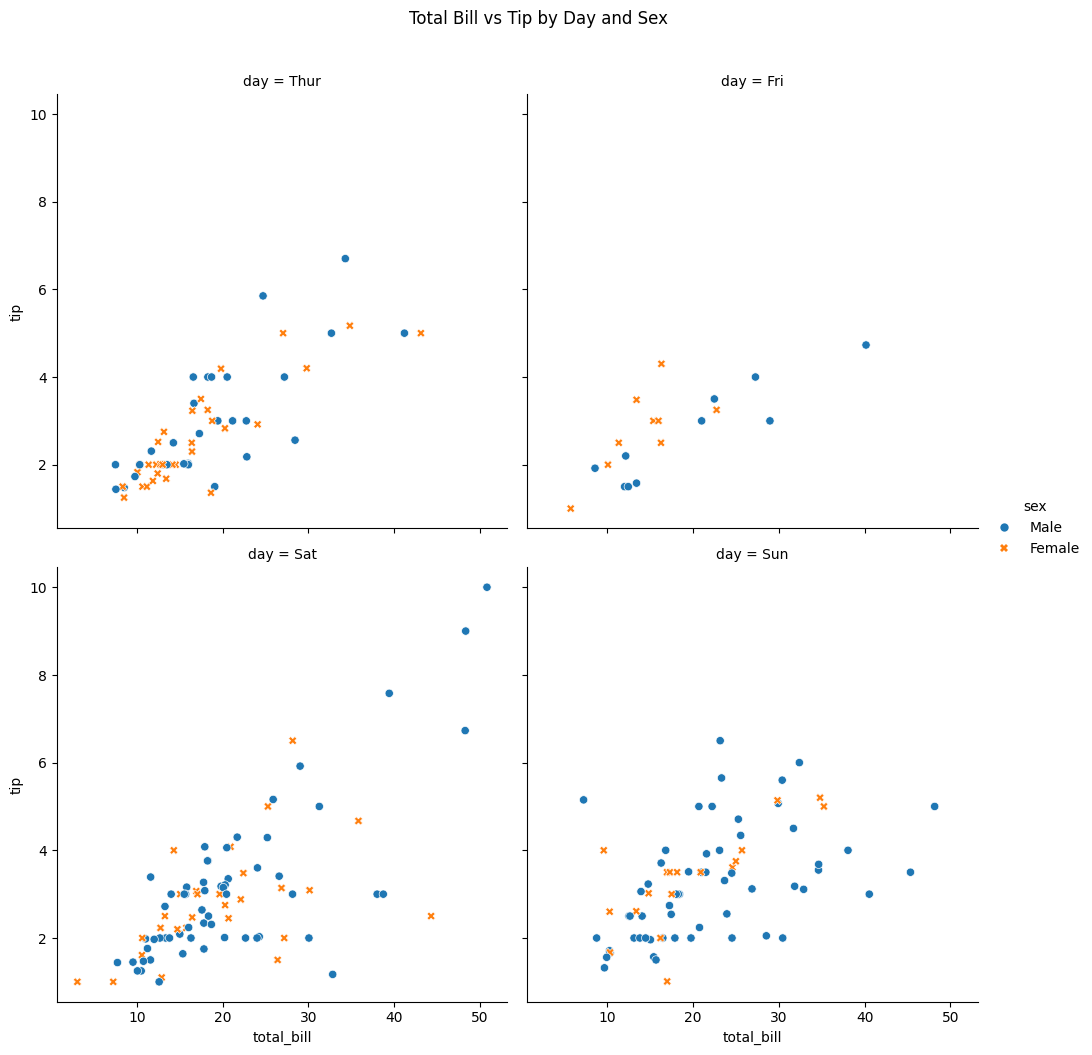

In [9]:
tips = sns.load_dataset("tips")

g = sns.relplot(data=tips, x="total_bill", y="tip", col="day", hue="sex", style="sex", col_wrap=2)

g.fig.suptitle("Total Bill vs Tip by Day and Sex", y=1.05)
plt.show()

### **Exercise 8: Displot**

**Task**: Create a distribution plot of tip amounts, showing histograms and kernel density estimates (KDE) for lunch and dinner (`time`) in separate subplots.  
**Instructions**: Use `sns.displot()`. Check the documentation for `kind='hist'`, `kde=True`, and `col` to split by `time`. Set `x='tip'` and use `hue='time'` for coloring. Add a title and labels.  
**Hint**: Experiment with `bins` and `kde_kws` to customize the KDE smoothness.

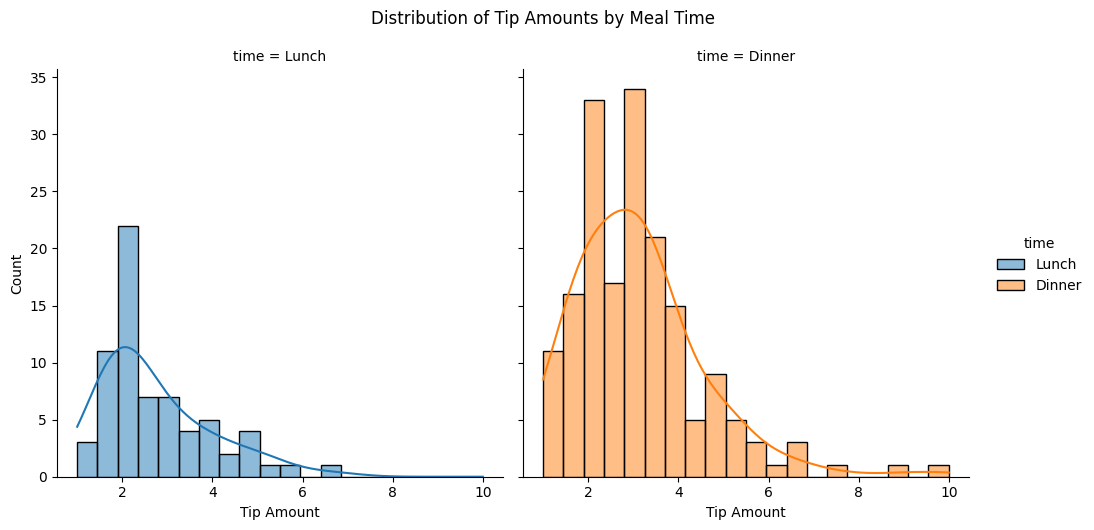

In [10]:
tips = sns.load_dataset("tips")

g = sns.displot(data=tips, x="tip", hue="time", col="time", kind="hist", kde=True, bins=20, kde_kws={"bw_adjust": 1.2})

g.set_axis_labels("Tip Amount", "Count")
g.fig.suptitle("Distribution of Tip Amounts by Meal Time", y=1.05)
plt.show()

### **Exercise 9: FacetGrid**

**Task**: Use FacetGrid to create a grid of scatter plots showing `total_bill` vs. `tip`, with rows for `smoker` and columns for `time`. Add a regression line to each subplot.  
**Instructions**: Use `sns.FacetGrid()`. Read the documentation to set up the grid with `row='smoker'` and `col='time'`. Map `sns.scatterplot` and `sns.regplot` to each facet. Add a title to the figure.  
**Hint**: Use `map_dataframe()` to apply plotting functions and set `scatter_kws` for point styling.

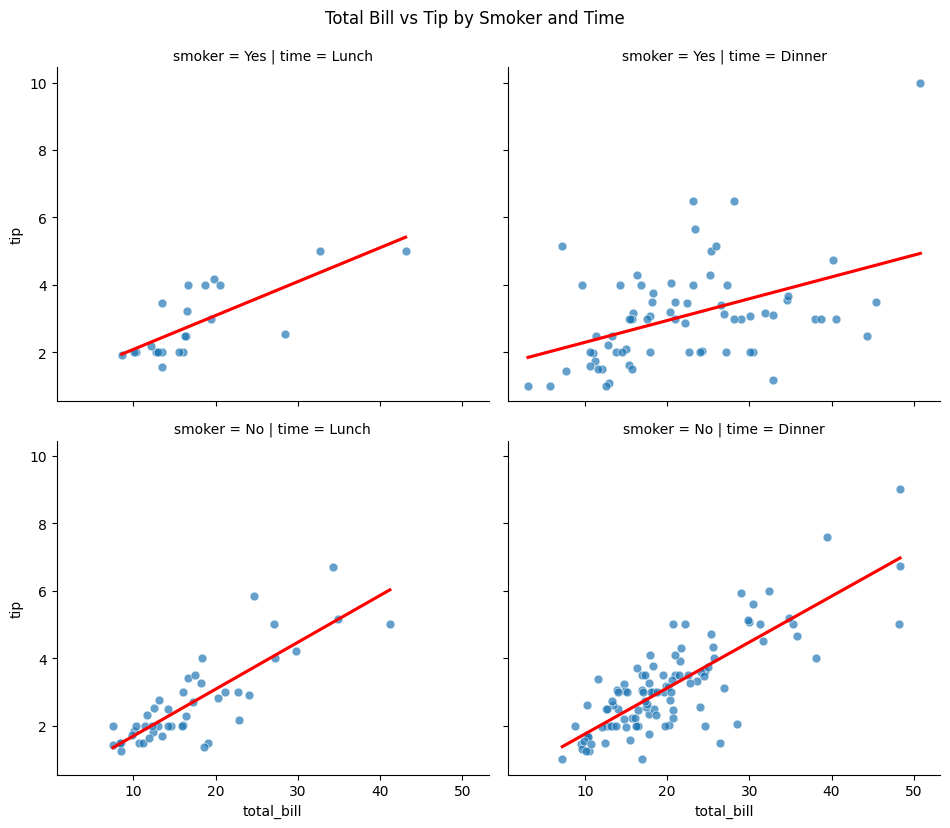

In [11]:
tips=sns.load_dataset("tips")

g = sns.FacetGrid(tips,row="smoker",col="time",height=4,aspect=1.2)

g.map_dataframe(sns.scatterplot,x="total_bill",y="tip",s=40,alpha=0.7)
g.map_dataframe(sns.regplot,x="total_bill",y="tip",scatter=False,ci=None,color="red")

g.fig.suptitle("Total Bill vs Tip by Smoker and Time",y=1.03)
plt.show()


### **Exercise 10: Regression Plot**

**Task**: Create a regression plot of `total_bill` vs. `tip`, with a linear fit and confidence intervals. Add a second plot with a polynomial regression (degree 2) for comparison.  
**Instructions**: Use `sns.lmplot()` for the linear fit. Check the documentation for `order=2` to create the polynomial fit in a separate `lmplot`. Set `x='total_bill'`, `y='tip'`, and use `hue='smoker'` to differentiate smokers and non-smokers. Add titles and labels.  
**Hint**: Use `ci=95` for confidence intervals and `scatter_kws` to adjust point appearance.

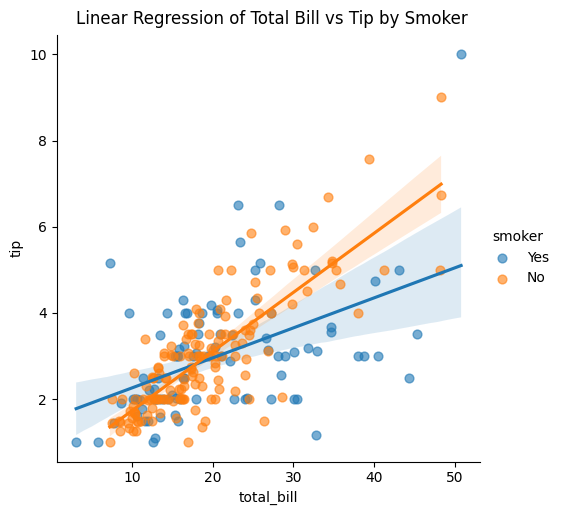

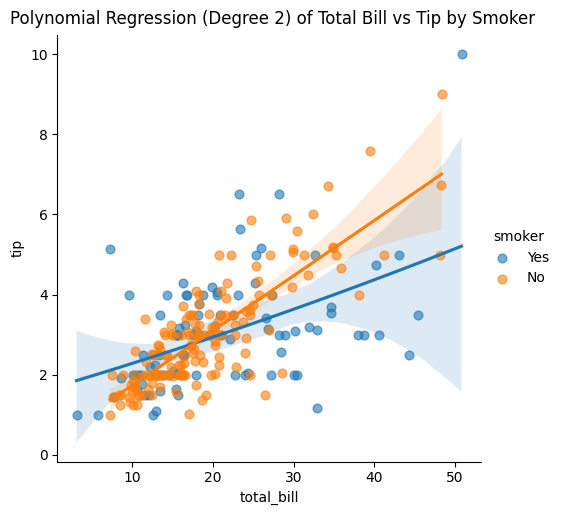

In [12]:
tips=sns.load_dataset("tips")

g1=sns.lmplot(data=tips,x="total_bill",y="tip",hue="smoker",ci=95,scatter_kws={"s":40,"alpha":0.6})
g1.fig.suptitle("Linear Regression of Total Bill vs Tip by Smoker",y=1.02)

g2=sns.lmplot(data=tips,x="total_bill",y="tip",hue="smoker",order=2,ci=95,scatter_kws={"s":40,"alpha":0.6})
g2.fig.suptitle("Polynomial Regression (Degree 2) of Total Bill vs Tip by Smoker",y=1.02)

plt.show()
